In [1]:
import data.grid_configuration as buc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ptc_twiss.transporter as twiss_transport
import ptc_twiss.madx_configuration as twiss_conf
import visualization.visualize as visualize
from data.units import unit_map, multiplier_for_unit
import visualization.optics_parameter_visualisation as opv
import ptc_twiss.optical_functions as mop
import sys
import os
import data.particles_generator as pg
from data.parameters_names import ParametersNames as Parameters
sns.set_style("whitegrid")

In [2]:
path_to_project = "/home/jakub/Desktop/optic_files"
folder_name = "2017_matched"
script_file_name = "ptc_twiss_script.madx"
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
twiss_configuration = twiss_conf.TwissConfiguration(path_to_script)
twiss_transporter = twiss_transport.get_transporter(twiss_configuration)

In [3]:
x_mean = 1150e-6
delta_x = 0
theta_x_mean = 160e-6
delta_theta_x = 0
y_mean = 0
delta_y = 0
theta_y_mean = 0
delta_theta_y = 0
pt_mean = -0.05
delta_pt = 0.05

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 11

grid_configuration_120 = buc.GridConfiguration.from_sigma(x_mean, delta_x, x_resolution,
                                                       theta_x_mean, delta_theta_x, theta_x_resolution,
                                                       y_mean, delta_y, y_resolution,
                                                       theta_y_mean, delta_theta_y, theta_y_resolution,
                                                        pt_mean, delta_pt, pt_resolution)
grid_120_name = r"$\theta_x = 120\mu$rad "
particles = pg.generate_from_range(grid_configuration_120)

(0, 220.00000000000009)

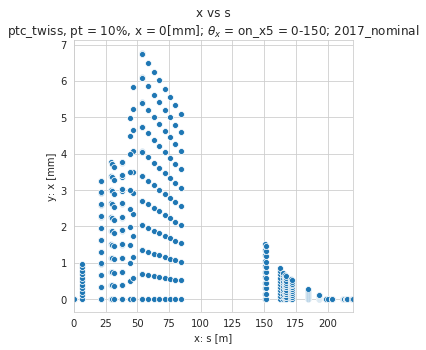

In [4]:
segments = twiss_transporter(particles)

f, axes = plt.subplots(1, 1)

pt = 0

matrix = segments["end"]

fig = plt.gcf()
fig.set_size_inches(5, 5)

title_sufix = r'ptc_twiss, pt = 10%, x = 0[mm]; $\theta_x$ = on_x5 = 0-150; 2017_nominal'

axes = visualize.plot_from_one_matrix(Parameters.S, Parameters.X, matrix, title_sufix=title_sufix, plot_function=sns.scatterplot)
axes.set_xlim(0,)

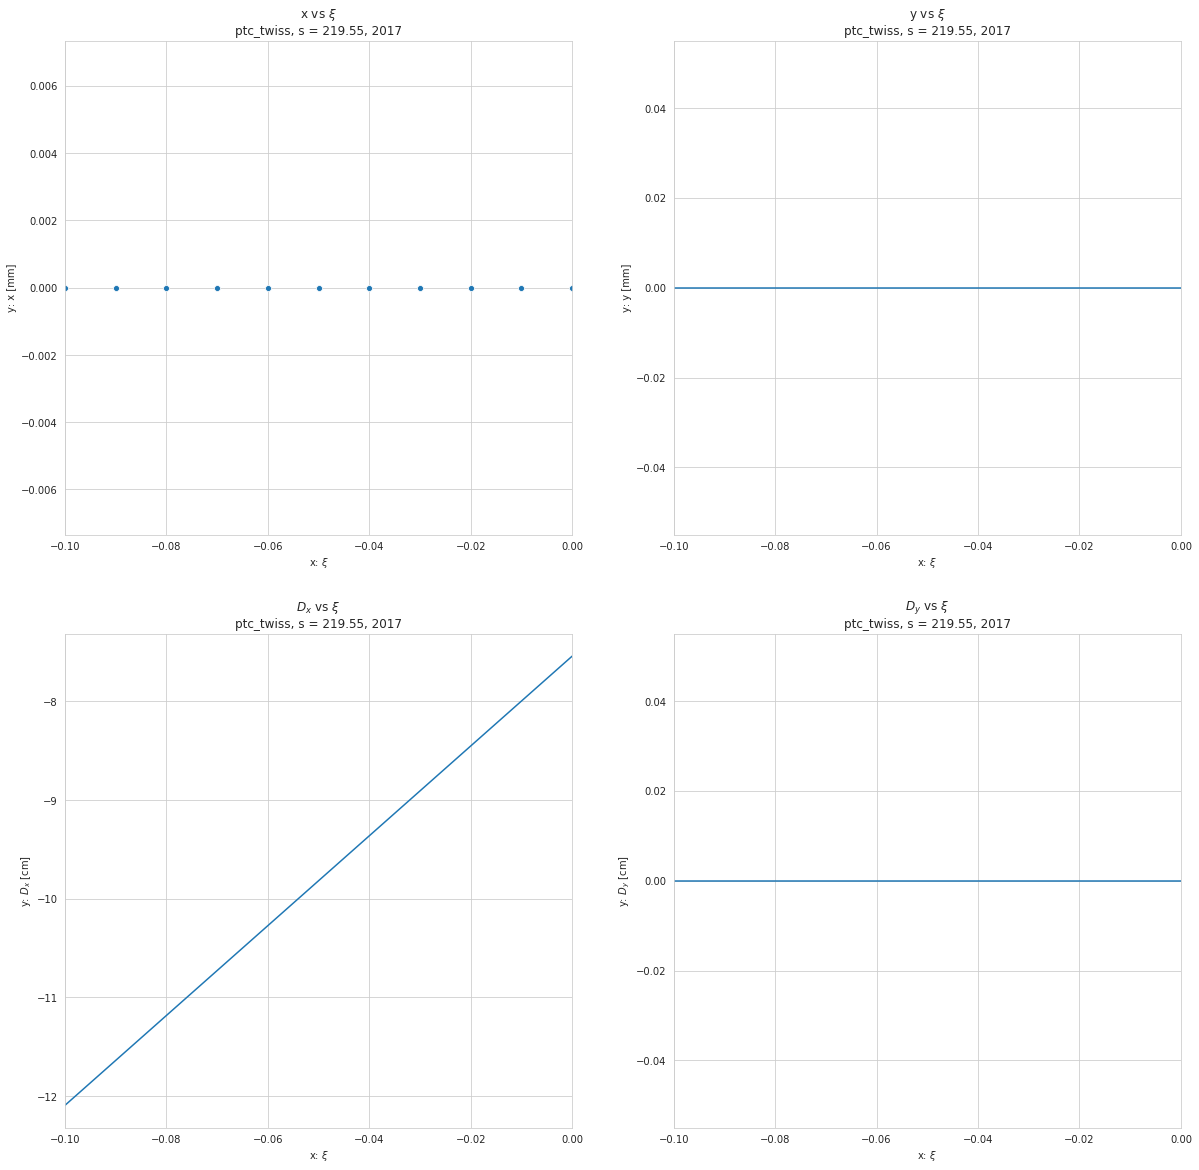

In [5]:
s = 219.55

filtered_matrix = matrix.filter_equals(Parameters.S, s)

f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

title_sufix = "ptc_twiss, s = 219.55, 2017"

visualize.plot_from_two_matrices(Parameters.PT, Parameters.X, filtered_matrix, filtered_matrix, title_sufix, plot_function=sns.scatterplot, ax=axes[0][0])

visualize.plot_from_two_matrices(Parameters.PT, Parameters.Y, filtered_matrix, filtered_matrix, title_sufix, ax=axes[0][1])

visualize.plot_from_two_matrices(Parameters.PT, Parameters.D_X, filtered_matrix, filtered_matrix, title_sufix, ax=axes[1][0])

visualize.plot_from_two_matrices(Parameters.PT, Parameters.D_Y, filtered_matrix, filtered_matrix, title_sufix, ax=axes[1][1])